In [ ]:
import os

os.chdir("../../test_data/system_tests/sensitivity_tests/MaxQuant")


In [ ]:

input_file = "peptides.txt"

samplemap_file = "samples.map.tsv"

results_dir = "results"
condpair_combinations=[("c1", "c2"), ("c1", "c3"), ("c2", "c3")]
condpair_combinations = [("c2", "c3")]

run_diffanalysis = True

In [ ]:
if run_diffanalysis:
    import directlfq.diff_analysis_manager as diffmgr
    
    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir, runtime_plots=False,condpair_combinations = condpair_combinations, volcano_fcthresh=0, outlier_correction=True)
    
    import pandas as pd
    import directlfq.visualizations as aqplot
    df_ions = pd.read_csv("./results/c2_VS_c3.results.ions.tsv", sep = "\t")

using input type maxquant_peptides
start processeing condpair ('c2', 'c3')
normalized within conditions
median -0.09240435743837239, mode -0.07562086604782403
using median for shift
shift comparison by 0.09240435743837239
normalized between conditions
t_ion2nonan_sw 0.10859990119934082
t_intensity_selection 1.337810754776001
t_ion2nonan_sw 0.11814403533935547
t_intensity_selection 1.314316987991333
checked 0 of 41464 ions
checked 2000 of 41464 ions
checked 4000 of 41464 ions
checked 6000 of 41464 ions
checked 8000 of 41464 ions
checked 10000 of 41464 ions
checked 12000 of 41464 ions
checked 14000 of 41464 ions
checked 16000 of 41464 ions
checked 18000 of 41464 ions
checked 20000 of 41464 ions
checked 22000 of 41464 ions
checked 24000 of 41464 ions
checked 26000 of 41464 ions
checked 28000 of 41464 ions
checked 30000 of 41464 ions
checked 32000 of 41464 ions
checked 34000 of 41464 ions
checked 36000 of 41464 ions
checked 38000 of 41464 ions
checked 40000 of 41464 ions
checked 0 of 6391 

In [ ]:
import directlfq.benchmarking as aqbench






directlfq_file = "./results/c2_VS_c3.results.tsv"
mapping_file = "prot2organism.tsv"
fdr_thresold = 0.05

results_aq = aqbench.ResultsTabledirectlfq(directlfq_file, input_name="directlfq", fdr_threshold=fdr_thresold)

speciesannotator = aqbench.SpeciesAnnotator(mapping_file=mapping_file,protein_column="protein", species_colum="organism")

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:1238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df[species_column] = [protein2species_dict.get(x) for x in results_df[protein_column]]


,species,variable,value
0,Homo sapiens,called,3
1,Saccharomyces cerevisiae,called,210


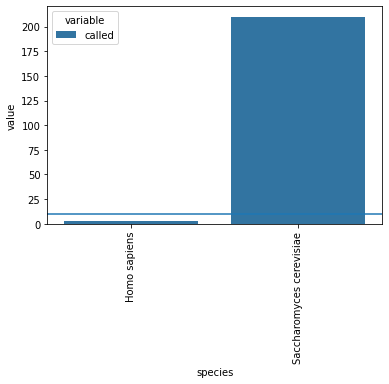

In [ ]:

speciesannotator.annotate_table_with_species(results_aq)

classplotter = aqbench.ClassificationBenchmarker(results_aq)

display(classplotter.speciescount_table)
ax = classplotter.plot_detected_proteins_per_species()